## Observations and Insights 

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [176]:
# Checking the number of mice.

Trial_Count=len(merge_table["Mouse ID"].unique())

print(f"The number of mice is {Trial_Count}!")

The number of mice is 249!


In [177]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merge_table.loc[merge_table.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()




In [98]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id


,0


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df=merge_table[merge_table["Mouse ID"].isin(duplicate_mouse) == False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [100]:
# Checking the number of mice in the clean DataFrame.

Mouse_Count=len(clean_df["Mouse ID"].unique())

print(f"There is a total of {Mouse_Count} mice")

There is a total of 249 mice


## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mr_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=mr_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=mr_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=mr_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=mr_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=mr_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

analysis_df=pd.DataFrame({"Mean TV":mean,"Median TV":median,"Variance":variance, "SD": sd, "SEM": sem})

analysis_df=analysis_df.round(2)

analysis_df


,Mean TV,Median TV,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
mean

median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
median

variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
variance

std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
std

sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
sem

print(f"The mean of {mean}")

print("----------")

print(f"The median of {median}")

print("----------")

print(f"The variance of {variance}")

print("----------")

print(f"The STD of {std}")

print("----------")

print(f"The SEM of {sem}")

The mean of Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
----------
The median of Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
----------
The variance of Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
----------
The STD of Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infub

## Bar and Pie Charts

Text(0, 0.5, 'Measurement')

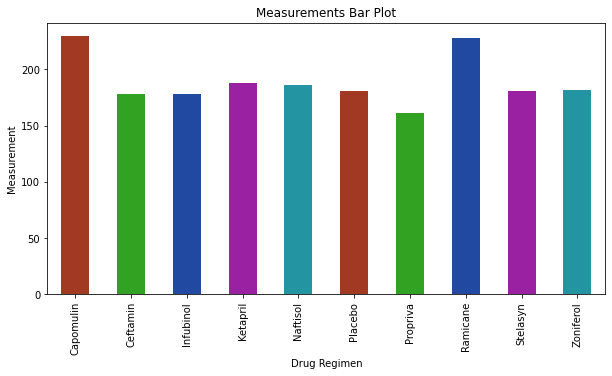

In [103]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


my_colors = ['#A23922', '#32A222', '#2249A2', '#9A22A2', '#2294A2']

#Grouping Data by Drug Regimen
regimen_meaurements = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#Creating Chart
regimen_data_points.plot(kind="bar", figsize=(10,5), color=my_colors)

#set chart title
plt.title("Measurements Bar Plot")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement")


Text(0, 0.5, 'Data Points')

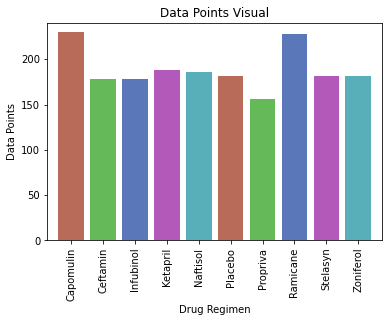

In [105]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#create array of data points
mice_list =(merge_table.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

#Creating Bar Chart
plt.bar(x_axis, mice_list, color=my_colors, alpha=0.75, align='center')

#Setting Ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

#Setting X and Y Limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_list)+10)

#Titles and Labels
plt.title("Measurements Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

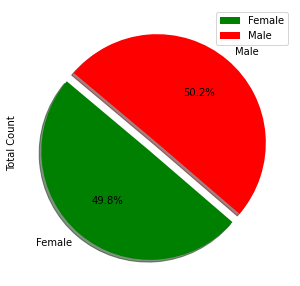

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by Gender
groupby_gender = final_mouse_df.groupby(["Mouse ID","Sex"])
groupby_gender
mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of different genders
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#Create and format the % of each gender
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#Creating Pie Chart
colors = ['green', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

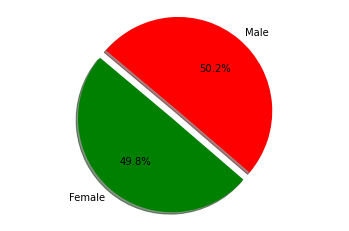

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels 
labels = ["Female","Male"]

#List the values of each section 
sizes = [49.799197,50.200803]

#Define colors for each section 
colors = ['green', 'red']

#Which section of the pie to detach?
explode = (0.1, 0)

#Create the pie chart based on values
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.71,0
245,z578,45,Ramicane,Male,11,16,30.64,0
246,z581,45,Infubinol,Female,24,25,62.75,3
247,z795,45,Naftisol,Female,13,29,65.74,3


In [157]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Put treatments into a list for for loop (and later for plot labels)
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin quartiles
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin: {lowerq}")
print(f"The upper quartile of Capomulin: {upperq}")
print(f"The interquartile range of Capomulin: {iqr}")
print(f"The median of Capomulin: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} are potential outliers.")
print(f"Values above {upper_bound} are potential outliers.")

print("----------------------------------------")

#Remicane quartiles

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} are potential outliers.")
print(f"Values above {upper_bound} are potential outliers.")

print("-----------------------------------------")

#Infubinol Quartile
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} are potential outliers.")
print(f"Values above {upper_bound} are potential outliers.")
Infubinol_merge.to_csv("output.csv")

print("-----------------------------------------")

#Ceftamin Quartile
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} are potential outliers.")
print(f"Values above {upper_bound} are potential outliers.")

The lower quartile of Capomulin: 32.37735684
The upper quartile of Capomulin: 40.1592203
The interquartile range of Capomulin: 7.781863460000004
The median of Capomulin: 38.125164399999996 
Values below 20.70456164999999 are potential outliers.
Values above 51.83201549 are potential outliers.
----------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 are potential outliers.
Values above 54.30681135 are potential outliers.
-----------------------------------------
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 are potential outliers.
Values above 82.74144559000001 are potential o

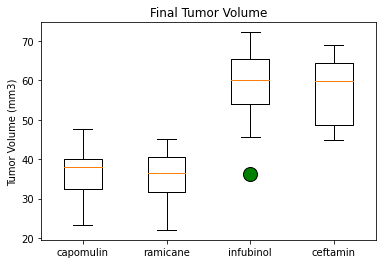

In [158]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

purple_out = dict(markerfacecolor='green',markersize=14)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= purple_out)


plt.title("Final Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

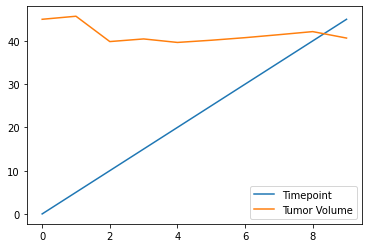

In [163]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Variable for time_vs_tumor
time_vs_tumor = final_mouse_df[final_mouse_df["Mouse ID"].isin(["v923"])]
time_vs_tumor

#Creating the DF for the data
time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume"]]
time_vs_tumor_data

#Reseting Index on that Df
line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

#Recreating the DF after reseting the index
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume"]]
line_plot_final

#Plotting line
lines = line_plot_final.plot.line()

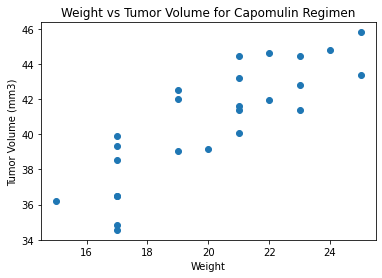

In [169]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

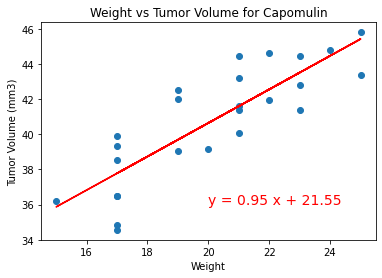

The correlation between these variables is 0.84


In [179]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

print(f"The correlation between these variables is {round(rvalue,2)}")